In [ ]:
import pandas as pd
import requests
import scipy.stats as stats
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Master In Data Science/Personal Python Script/lpetrocelli-lendingclub-loan-data-2017-q-1/LoanStats_2017Q1 2.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (112) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df['id'] = df.index

In [ ]:
df_sel = df[['id','annual_inc','loan_amnt','total_rec_late_fee','delinq_2yrs','inq_last_12m','int_rate','all_util']]
percent_missing = df_sel.isnull().sum() * 100 / len(df_sel)
missing_value_df = pd.DataFrame({'column_name': df_sel.columns,
                                 'percent_missing': percent_missing})

In [ ]:
missing_value_df.loc[missing_value_df['percent_missing'] > 0 ].sort_values('percent_missing', ascending=False)

,column_name,percent_missing
all_util,all_util,0.0031


# Annual Income

In [ ]:
import scipy.stats as stats
df_sel['inc_log'] = np.log(df_sel['annual_inc']+0.1)
df_sel.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,annual_inc,loan_amnt,total_rec_late_fee,delinq_2yrs,inq_last_12m,int_rate,all_util,inc_log
0,0,120000.0,3600,0.0,0,4,7.49%,39.0,11.695248
1,1,125000.0,15000,0.0,0,0,14.99%,69.0,11.736070
2,2,50000.0,8400,0.0,0,7,11.39%,65.0,10.819780
3,3,50000.0,4000,0.0,1,1,10.49%,56.0,10.819780
4,4,125000.0,6000,0.0,0,1,7.24%,83.0,11.736070


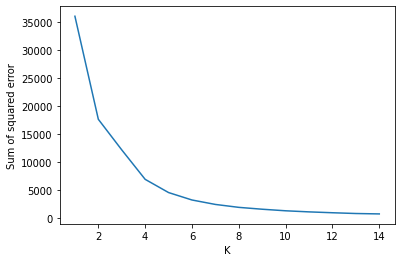

In [ ]:
from sklearn.cluster import KMeans

sse = []
k_rng = range(1,15)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_sel[['inc_log']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)  

In [ ]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df_sel[['inc_log']])

df_sel['inc_cluster'] = y_predicted


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
for i in range (0,4):
  print('Cluster ' + str(i) + ': ' + str(np.median(df_sel['annual_inc'].loc[df_sel['inc_cluster'] == i])) )

Cluster 0: 135000.0
Cluster 1: 40000.0
Cluster 2: 0.0
Cluster 3: 73000.0


In [ ]:
df_sel.loc[df_sel['inc_cluster'] == 2, 'inc_score'] = 0
df_sel.loc[df_sel['inc_cluster'] == 1, 'inc_score'] = 1
df_sel.loc[df_sel['inc_cluster'] == 3, 'inc_score'] = 2
df_sel.loc[df_sel['inc_cluster'] == 0, 'inc_score'] = 3



In [ ]:
df_sel.groupby(['inc_score'])['id'].count()

inc_score
1.0       33
2.0    29723
3.0    45996
4.0    21027
Name: id, dtype: int64

In [ ]:
inc_log = df_sel[['inc_log']]
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(inc_log)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(inc_log, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.5380752147527527
For n_clusters = 3 The average silhouette_score is : 0.5149541889873751
For n_clusters = 4 The average silhouette_score is : 0.522719289370218
For n_clusters = 5 The average silhouette_score is : 0.5192425189058957
For n_clusters = 6 The average silhouette_score is : 0.5217407235070831


# Delinq

In [ ]:
df_sel['deling_log'] = np.log(df_sel['delinq_2yrs']+0.1)
df_sel.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,annual_inc,loan_amnt,total_rec_late_fee,delinq_2yrs,inq_last_12m,int_rate,all_util,inc_log,deling_log
0,0,120000.0,3600,0.0,0,4,7.49%,39.0,11.695248,-2.302585
1,1,125000.0,15000,0.0,0,0,14.99%,69.0,11.736070,-2.302585
2,2,50000.0,8400,0.0,0,7,11.39%,65.0,10.819780,-2.302585
3,3,50000.0,4000,0.0,1,1,10.49%,56.0,10.819780,0.095310
4,4,125000.0,6000,0.0,0,1,7.24%,83.0,11.736070,-2.302585


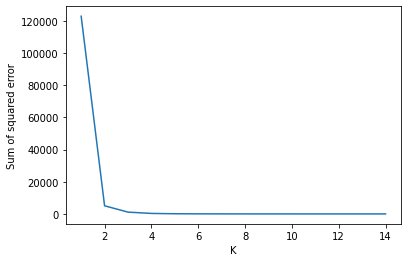

In [ ]:
from sklearn.cluster import KMeans

sse = []
k_rng = range(1,15)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_sel[['deling_log']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)  

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_sel[['deling_log']])

df_sel['deling_cluster'] = y_predicted


In [ ]:
for i in range (0,3):
  print('Cluster ' + str(i) + ': ' + str(np.median(df_sel['delinq_2yrs'].loc[df_sel['deling_cluster'] == i])) )

Cluster 0: 0.0
Cluster 1: 1.0
Cluster 2: 5.0
Cluster 3: 2.0


In [ ]:
df_sel.loc[df_sel['deling_cluster'] == 2, 'deling_score'] = 0
df_sel.loc[df_sel['deling_cluster'] == 3, 'deling_score'] = 1
df_sel.loc[df_sel['deling_cluster'] == 1, 'deling_score'] = 2
df_sel.loc[df_sel['deling_cluster'] == 0, 'deling_score'] = 3


In [ ]:
df_sel.groupby(['deling_score'])['id'].count()

deling_score
1.0     1538
2.0     5383
3.0    13217
4.0    76641
Name: id, dtype: int64

In [ ]:
deling_log = df_sel[['deling_log']]
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(deling_log)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(deling_log, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.9663010087578521
For n_clusters = 3 The average silhouette_score is : 0.9701166989172275
For n_clusters = 4 The average silhouette_score is : 0.979633039646386
For n_clusters = 5 The average silhouette_score is : 0.9895882575078391
For n_clusters = 6 The average silhouette_score is : 0.994066957161959


# Credit Limit Utilization Rate

In [ ]:
#df_sel = pd.read_csv('/content/drive/Shareddrives/Master In Data Science/Personal Python Script/lpetrocelli-lendingclub-loan-data-2017-q-1/customer_score.csv') 

#df_sel['all_util'].fillna(df_sel['all_util'].median(), inplace=True)
df_sel['cru'] = df_sel['loan_amnt'] / df_sel['tot_hi_cred_lim']

df_sel['cru_log'] = np.log(df_sel['cru']+0.1)
df_sel.head()

,id,annual_inc,loan_amnt,total_rec_late_fee,delinq_2yrs,inq_last_12m,int_rate,all_util,inc_log,inc_cluster,rev_score,inc_score,deling_log,deling_cluster,deling_score,loan_log,loan_cluster,util_log,util_cluster,util_score,tot_hi_cred_lim,cru,cru_log
0,0,120000.0,3600,0.0,0,4,7.49%,39.0,11.695248,2,3.0,3.0,-2.302585,0,3.0,8.188717,3,3.666122,3,1.0,93599,0.038462,-1.977160
1,1,125000.0,15000,0.0,0,0,14.99%,69.0,11.736070,2,3.0,3.0,-2.302585,0,3.0,9.615812,0,4.235555,0,0.0,148572,0.100961,-1.604644
2,2,50000.0,8400,0.0,0,7,11.39%,65.0,10.819780,1,1.0,1.0,-2.302585,0,3.0,9.035999,1,4.175925,0,0.0,205671,0.040842,-1.960117
3,3,50000.0,4000,0.0,1,1,10.49%,56.0,10.819780,1,1.0,1.0,0.095310,1,2.0,8.294075,1,4.027136,3,1.0,152852,0.026169,-2.070132
4,4,125000.0,6000,0.0,0,1,7.24%,83.0,11.736070,2,3.0,3.0,-2.302585,0,3.0,8.699531,1,4.420045,0,0.0,72865,0.082344,-1.701860


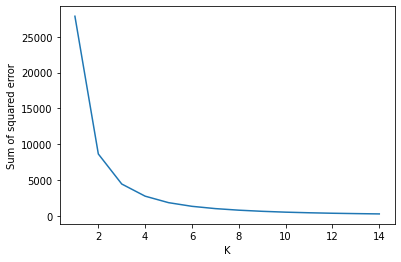

In [ ]:
from sklearn.cluster import KMeans

sse = []
k_rng = range(1,15)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_sel[['cru_log']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)  

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_sel[['cru_log']])

df_sel['cru_cluster'] = y_predicted


In [ ]:
for i in range (0,3):
  print('Cluster ' + str(i) + ': ' + str(np.median(df_sel['cru'].loc[df_sel['cru_cluster'] == i])) )

Cluster 0: 0.17391304347826086
Cluster 1: 0.05085451476898267
Cluster 2: 0.43715130364802157


In [ ]:
df_sel.loc[df_sel['cru_cluster'] == 2, 'cru_score'] = 1
df_sel.loc[df_sel['cru_cluster'] == 0, 'cru_score'] = 2
df_sel.loc[df_sel['cru_cluster'] == 1, 'cru_score'] = 3



In [ ]:
df_sel.groupby(['cru_score'])['id'].count()

cru_score
1.0    14980
2.0    32317
3.0    49482
Name: id, dtype: int64

In [ ]:
util_log = df_sel[['cru_log']]
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(util_log)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(util_log, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.62562591869075
For n_clusters = 3 The average silhouette_score is : 0.5816227640792679
For n_clusters = 4 The average silhouette_score is : 0.5530495657893666
For n_clusters = 5 The average silhouette_score is : 0.5411770961417
For n_clusters = 6 The average silhouette_score is : 0.5353016643706187


In [ ]:
df_sel.to_csv('/content/drive/Shareddrives/Master In Data Science/Personal Python Script/lpetrocelli-lendingclub-loan-data-2017-q-1/customer_score.csv', index=False)

# Customer Segmentation

In [ ]:
pd_score = pd.read_csv('/content/drive/Shareddrives/Master In Data Science/Personal Python Script/lpetrocelli-lendingclub-loan-data-2017-q-1/customer_score.csv')

In [ ]:
pd_score.head()

,id,annual_inc,loan_amnt,total_rec_late_fee,delinq_2yrs,inq_last_12m,int_rate,all_util,inc_log,inc_cluster,rev_score,inc_score,deling_log,deling_cluster,deling_score,loan_log,loan_cluster,util_log,util_cluster,util_score,tot_hi_cred_lim,cru,cru_log,cru_cluster,cru_score
0,0,120000.0,3600,0.0,0,4,7.49%,39.0,11.695248,2,3.0,3.0,-2.302585,0,3.0,8.188717,3,3.666122,3,1.0,93599,0.038462,-1.977160,1,3.0
1,1,125000.0,15000,0.0,0,0,14.99%,69.0,11.736070,2,3.0,3.0,-2.302585,0,3.0,9.615812,0,4.235555,0,0.0,148572,0.100961,-1.604644,1,3.0
2,2,50000.0,8400,0.0,0,7,11.39%,65.0,10.819780,1,1.0,1.0,-2.302585,0,3.0,9.035999,1,4.175925,0,0.0,205671,0.040842,-1.960117,1,3.0
3,3,50000.0,4000,0.0,1,1,10.49%,56.0,10.819780,1,1.0,1.0,0.095310,1,2.0,8.294075,1,4.027136,3,1.0,152852,0.026169,-2.070132,1,3.0
4,4,125000.0,6000,0.0,0,1,7.24%,83.0,11.736070,2,3.0,3.0,-2.302585,0,3.0,8.699531,1,4.420045,0,0.0,72865,0.082344,-1.701860,1,3.0


In [ ]:
#df_score = pd_score[['id','inc_score','deling_score','util_score']]
df_score = df_sel[['id','inc_score','deling_score','cru_score']] 

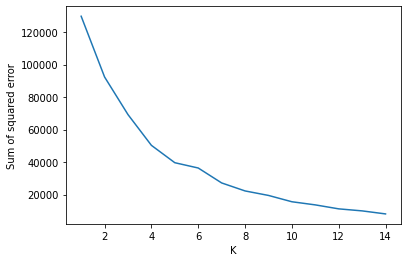

In [ ]:
sse = []
k_rng = range(1,15)
for k in k_rng:
    km = KMeans(n_clusters=k)
    #km.fit(history_set_concat[['close_z','volume_z', 'max_close_30_%' ,'50_ma_var','100_ma_var', '50_100_ma_var', 'previous close_var', 'previous_close_var_2', 'previous_close_var_3', 'previous_close_var_4',
    #   'previous_close_var_5', 'open_var']])
    km.fit(df_score[['inc_score','deling_score','cru_score']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
col = df_sel[['inc_score','deling_score','cru_score']] 
range_n_clusters = [ 5, 6, 7, 8, 9]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(col)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(col, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.5083765956881823
For n_clusters = 6 The average silhouette_score is : 0.5526862289472834
For n_clusters = 7 The average silhouette_score is : 0.6055689579149159
For n_clusters = 8 The average silhouette_score is : 0.6739118297581435
For n_clusters = 9 The average silhouette_score is : 0.7251121842236758


In [ ]:
km = KMeans(n_clusters=8)
score_predicted = km.fit_predict(df_score[['inc_score','deling_score','cru_score']])
df_score['score_cluster'] = score_predicted
df_score['final_score'] = df_score['inc_score'] + df_score['deling_score'] + df_score['cru_score']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df_score.groupby(['score_cluster'])['final_score','inc_score','deling_score','cru_score'].mean().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,score_cluster,final_score,inc_score,deling_score,cru_score
0,0,7.222908,2.307476,3.000000,1.915432
1,1,8.000000,2.000000,3.000000,3.000000
2,2,6.866576,2.268412,1.598164,3.000000
3,3,5.427636,1.479872,2.947763,1.000000
4,4,5.882104,0.997793,2.885599,1.998713
5,5,9.000000,3.000000,3.000000,3.000000
6,6,6.859711,0.999091,2.860620,3.000000
7,7,5.414031,2.108979,1.579373,1.725678


In [ ]:
df_score.groupby(['score_cluster'])['id'].count()

score_cluster
0    18151
1    18915
2    10238
3    11601
4    10874
5    10428
6     9901
7     6671
Name: id, dtype: int64

In [ ]:
df_score.head()

,id,inc_score,deling_score,cru_score,score_cluster,final_score
0,0,3.0,3.0,3.0,5,9.0
1,1,3.0,3.0,3.0,5,9.0
2,2,1.0,3.0,3.0,6,7.0
3,3,1.0,2.0,3.0,6,6.0
4,4,3.0,3.0,3.0,5,9.0


In [ ]:
df_score.to_csv('/content/drive/Shareddrives/Master In Data Science/Personal Python Script/lpetrocelli-lendingclub-loan-data-2017-q-1/customer_segment.csv', index=False)

## Classification

In [ ]:
df_score = pd.read_csv('/content/drive/Shareddrives/Master In Data Science/Personal Python Script/lpetrocelli-lendingclub-loan-data-2017-q-1/customer_segment.csv')
df_class = pd.merge(df_score, pd_score, how="left", on=["id"])

In [ ]:
dfx = df_class[['annual_inc','delinq_2yrs','cru']]
dfy = df_class['score_cluster']  

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.30, random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search__rf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
rf = RandomForestClassifier().fit(X_train, y_train)
#grid_search__rf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix
x_pred = rf.predict(X_train)
#x_pred = grid_search__rf.predict(X_train)
cfm = confusion_matrix(y_train.tolist(), x_pred )
print(cfm)

[[12760     0     0     0     0     0     0     0]
 [    0 13278     0     0     0     0     0     0]
 [    0     0  7252     0     0     0     0     0]
 [    0     0     0  8092     0     0     0     0]
 [    0     0     0     0  7519     0     0     0]
 [    0     0     0     0     0  7230     0     0]
 [    0     0     0     0     0     0  6944     0]
 [    0     0     0     0     0     0     0  4670]]


In [ ]:
y_pred = rf.predict(X_test)
#y_pred = grid_search__rf.predict(X_test)
cfm = confusion_matrix(y_test.tolist(), y_pred )
print(cfm)

[[5390    0    0    0    1    0    0    0]
 [   0 5636    0    0    0    0    1    0]
 [   0    0 2986    0    0    0    0    0]
 [   0    0    0 3509    0    0    0    0]
 [   0    0    0    0 3355    0    0    0]
 [   0    0    0    0    0 3198    0    0]
 [   0    0    1    0    0    0 2956    0]
 [   0    0    0    0    0    0    0 2001]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5391
           1       1.00      1.00      1.00      5637
           2       1.00      1.00      1.00      2986
           3       1.00      1.00      1.00      3509
           4       1.00      1.00      1.00      3355
           5       1.00      1.00      1.00      3198
           6       1.00      1.00      1.00      2957
           7       1.00      1.00      1.00      2001

    accuracy                           1.00     29034
   macro avg       1.00      1.00      1.00     29034
weighted avg       1.00      1.00      1.00     29034



In [ ]:
X_test['score_cluster'] = y_test
X_test['pred_cluster'] =  y_pred
X_test.head(25)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,annual_inc,delinq_2yrs,cru,score_cluster,pred_cluster
94619,48000.0,0,0.174531,4,4
51450,75000.0,1,0.059958,2,2
89242,100000.0,1,0.074013,2,2
90175,75000.0,0,0.334320,3,3
7655,85000.0,0,0.024872,1,1
19768,62000.0,0,0.008698,1,1
70279,56000.0,0,0.044506,1,1
41761,150000.0,0,0.054776,5,5
87328,35000.0,0,0.087637,6,6
69633,26000.0,0,0.273876,4,4


In [ ]:
X_test.loc[( X_test['score_cluster'] == 3 ) | ( X_test['score_cluster'] == 5 ) ].head(15)

NameError: ignored

In [ ]:
import pickle
filename = '/content/drive/Shareddrives/Master In Data Science/Personal Python Script/lpetrocelli-lendingclub-loan-data-2017-q-1/customer_segmentation.sav'
pickle.dump(rf, open(filename, 'wb'))